## Programmieraufgabe 2  

<span style="color:red; font-weight: bold">Wichtig: Damit alle ben&ouml;tigten Pakete richtig eingebunden werden, f&uuml;hren Sie die n&auml;chste Zelle einmal aus, sobald Sie das Notebook neu &ouml;ffnen.</span>

In [1]:
# some setup
%matplotlib inline
import numpy as np # makes numpy routines and data types available as np.[name ouf routine or data type]
import matplotlib.pyplot as plt # makes plotting command available as plot.[name of command]

from ipywidgets import interactive
import random

## W&uuml;rfeln II

a)  Erzeugen Sie eine Liste mit $n = 100$ Zufallszahlen aus der Menge $\{ 1,2,3,4,5,6 \}$,
und bestimmen Sie, wie oft die Zahl 3 in der Liste vorkommt. 
Welche Verteilung hat die Zufallsvariable $Z(\omega)$, die dieses Zufallsexperiment modelliert?

b)  Wir wiederholen das Experiment nun $m = 2000$ mal. 
Speichern  Sie  in  einer  Liste $z$ die beobachteten (relativen) H&auml;ufigkeiten der Zahl 3 in jeder der $m$ Stichproben von jeweils $n$ Zufallszahlen.

c)  Die  Liste $z$ enth&auml;lt nun  $m$  (pseudozuf&auml;llige)  Realisierungen  der  Werte  der  Zufallsvariablen $Z$. 
Erstellen Sie ein Histogramm von $z$. 
Zeichnen Sie das Histogramm in  ein  Diagramm  zusammen  mit  der  Massenfunktion  der  Zufallsvariablen $Z$ 
und vergleichen Sie.

d)  Erstellen Sie mithilfe von $\texttt{interactive}$ ein entsprechendes Histogramm f&uuml;r die ersten
$k$ Werte der Liste $z$, wobei $k$ zwischen 1 und $m$ variiert werden kann. Was beobachten Sie?

## a)

In [20]:
random.seed("Meinhardt")
x = [random.randint(1,6) for i in range(100)]
histogram = np.histogram(x,bins=6)
Z = histogram[0][2]
print(histogram[0])
print(f"Die Anzahl der 3en in diesen 100 Würfen ist: {Z}.")

[10 11 21 20 20 18]
Die Anzahl der 3en in diesen 100 Würfen ist: 21.


Die Zufallsvariable $Z(\omega)$ ist Binomialverteilt zu den Parametern n = 100, $p = 1/6$

## b) und c)

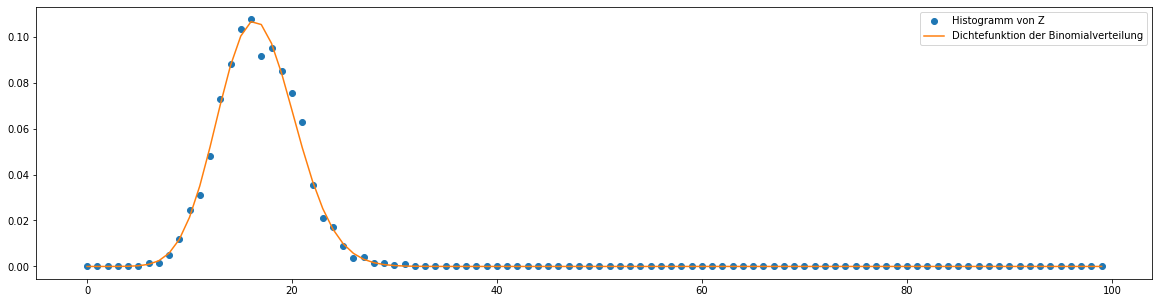

In [34]:
import scipy.stats
plt.rcParams["figure.figsize"] = (20,5)


z = [np.histogram([random.randint(1,6) for j in range(100)],bins=6)[0][2] for i in range(2000)]
histo = np.histogram(z,bins=100,range=(0,100),density=True)[0]
plt.plot(histo,'o')
dist = [scipy.stats.binom.pmf(i,100,1/6) for i in range(100)]
#print(dist)
plt.plot(dist)
plt.legend(['Histogramm von Z','Dichtefunktion der Binomialverteilung'])
plt.show()

## d)


In [38]:
from ipywidgets import interact, interactive, IntSlider, interact_manual

def hist(k):
    histo = np.histogram(z[:k],bins=100,range=(0,100),density=True)[0]
    plt.plot(histo,'o')
    plt.plot(dist)
    plt.legend(['Histogramm von Z','Dichtefunktion der Binomialverteilung'])

interact_manual(hist, k=(0,2000))
# Siehe Tutorial hier: https://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html#Basic-interact

interactive(children=(IntSlider(value=1000, description='k', max=2000), Button(description='Run Interact', sty…

<function __main__.hist(k)>

Für größere m sind die Abweichungen von der Dichtefunktion immer geringer.